# EDA

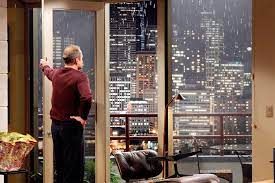

In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# importing raw data
df_eda = pd.read_csv("eda.csv")


In [6]:
df_eda.shape

(21597, 22)

In [7]:
df_eda.head(7)

,sale_id,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,3,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,4,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,5,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,6,2014-05-12,1230000.000,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,7,2014-06-27,257500.000,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000


In [8]:
df_eda.describe()

,sale_id,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,10799.000,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,6234.661,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,1.000,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,5400.000,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,10799.000,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,16198.000,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,21597.000,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [9]:
df_eda.tail(7)

,sale_id,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21590,21591,2015-03-26,1010000.000,7936000429,4.000,3.500,3510.000,7200.000,2.000,0.000,...,9,2600.000,910.000,2009,0.000,98136,47.554,-122.398,2050.000,6200.000
21591,21592,2015-02-19,475000.000,2997800021,3.000,2.500,1310.000,1294.000,2.000,0.000,...,8,1180.000,130.000,2008,0.000,98116,47.577,-122.409,1330.000,1265.000
21592,21593,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,21594,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,21595,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,21596,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000
21596,21597,2014-10-15,325000.000,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,...,7,1020.000,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000


In [10]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_id        21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [11]:
df_eda.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [12]:
df_eda.dtypes

sale_id            int64
date              object
price            float64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [13]:
type(df_eda['date'][0])

str

In [14]:
# change "date" dtype to datetime with format %Y/%m/%d
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y-%m-%d')

In [15]:
type(df_eda['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# display number of distinct elements
df_eda.grade.nunique()

11

In [17]:
df_eda['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [18]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [17]:
# display number of missing values per column
df_eda.isna().sum()

sale_id             0
date                0
price               0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

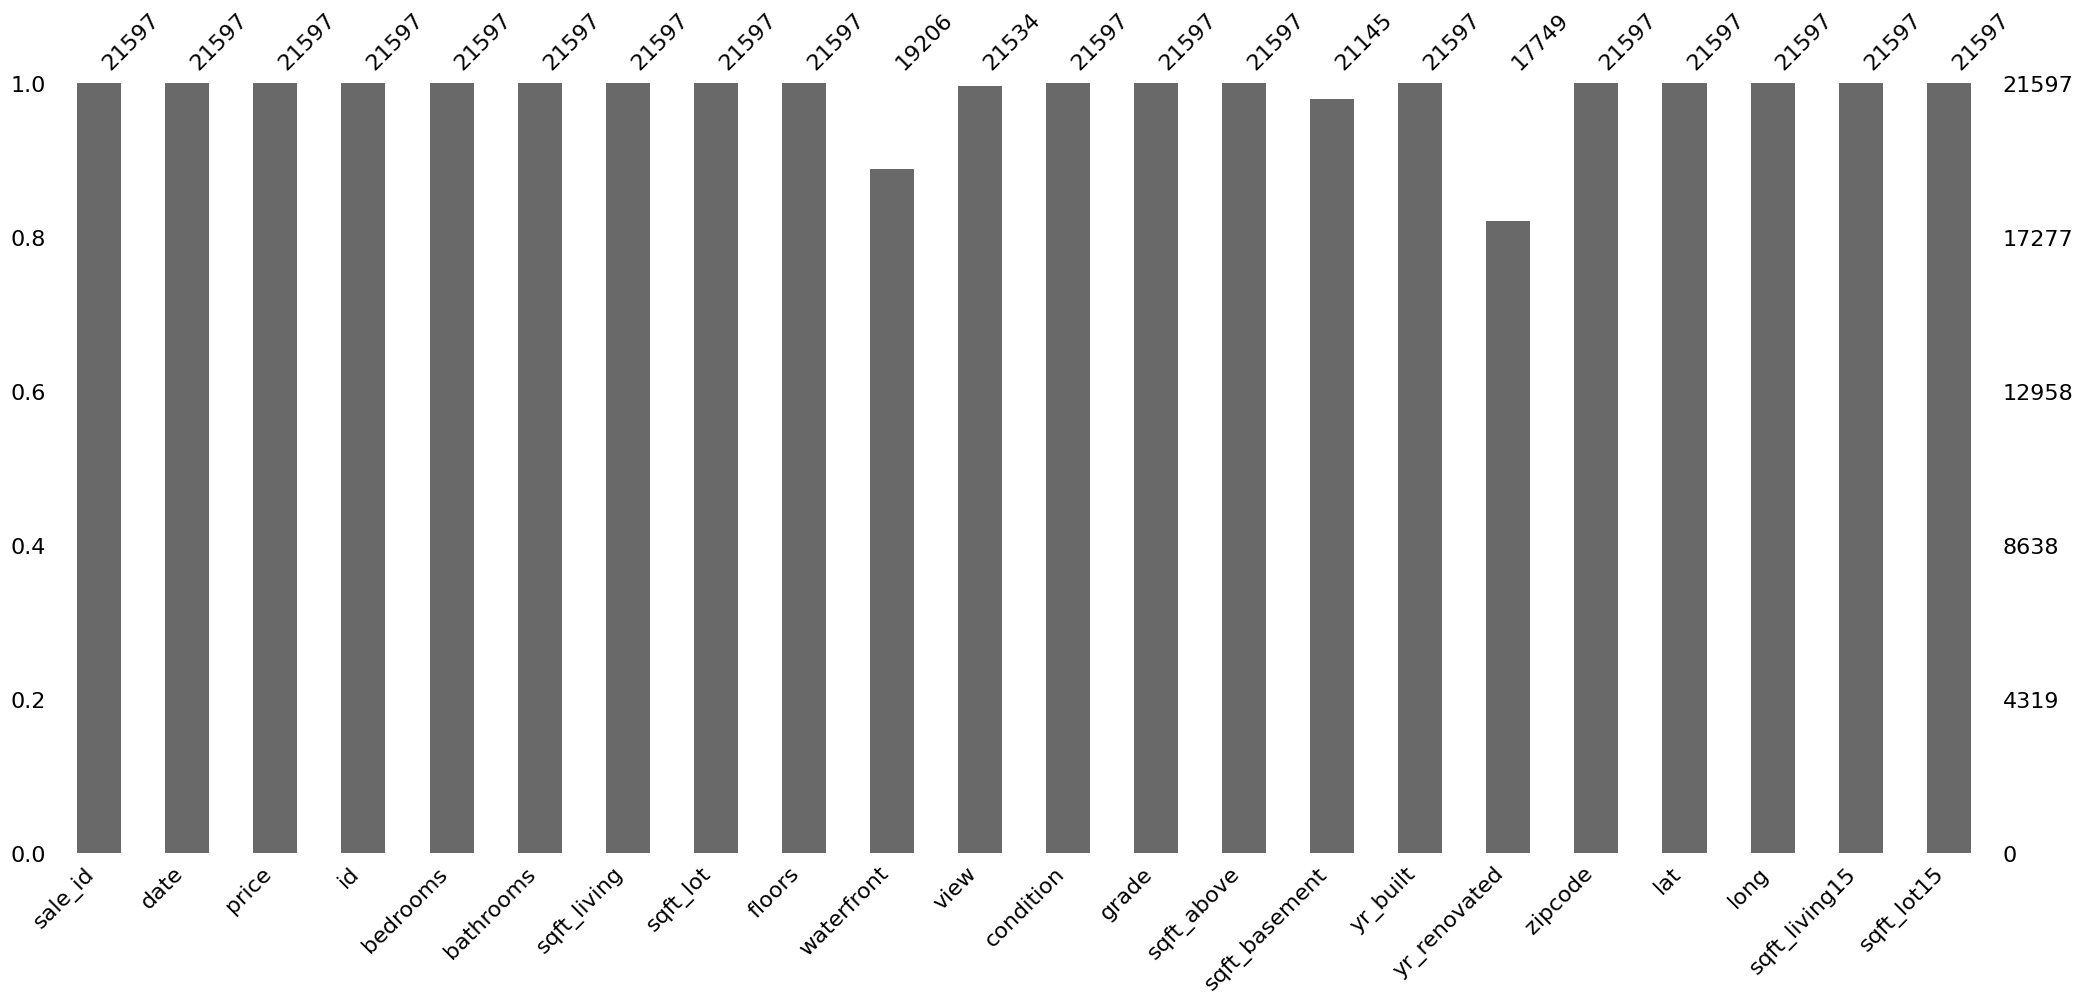

In [18]:
msno.bar(df_eda)

<Axes: >

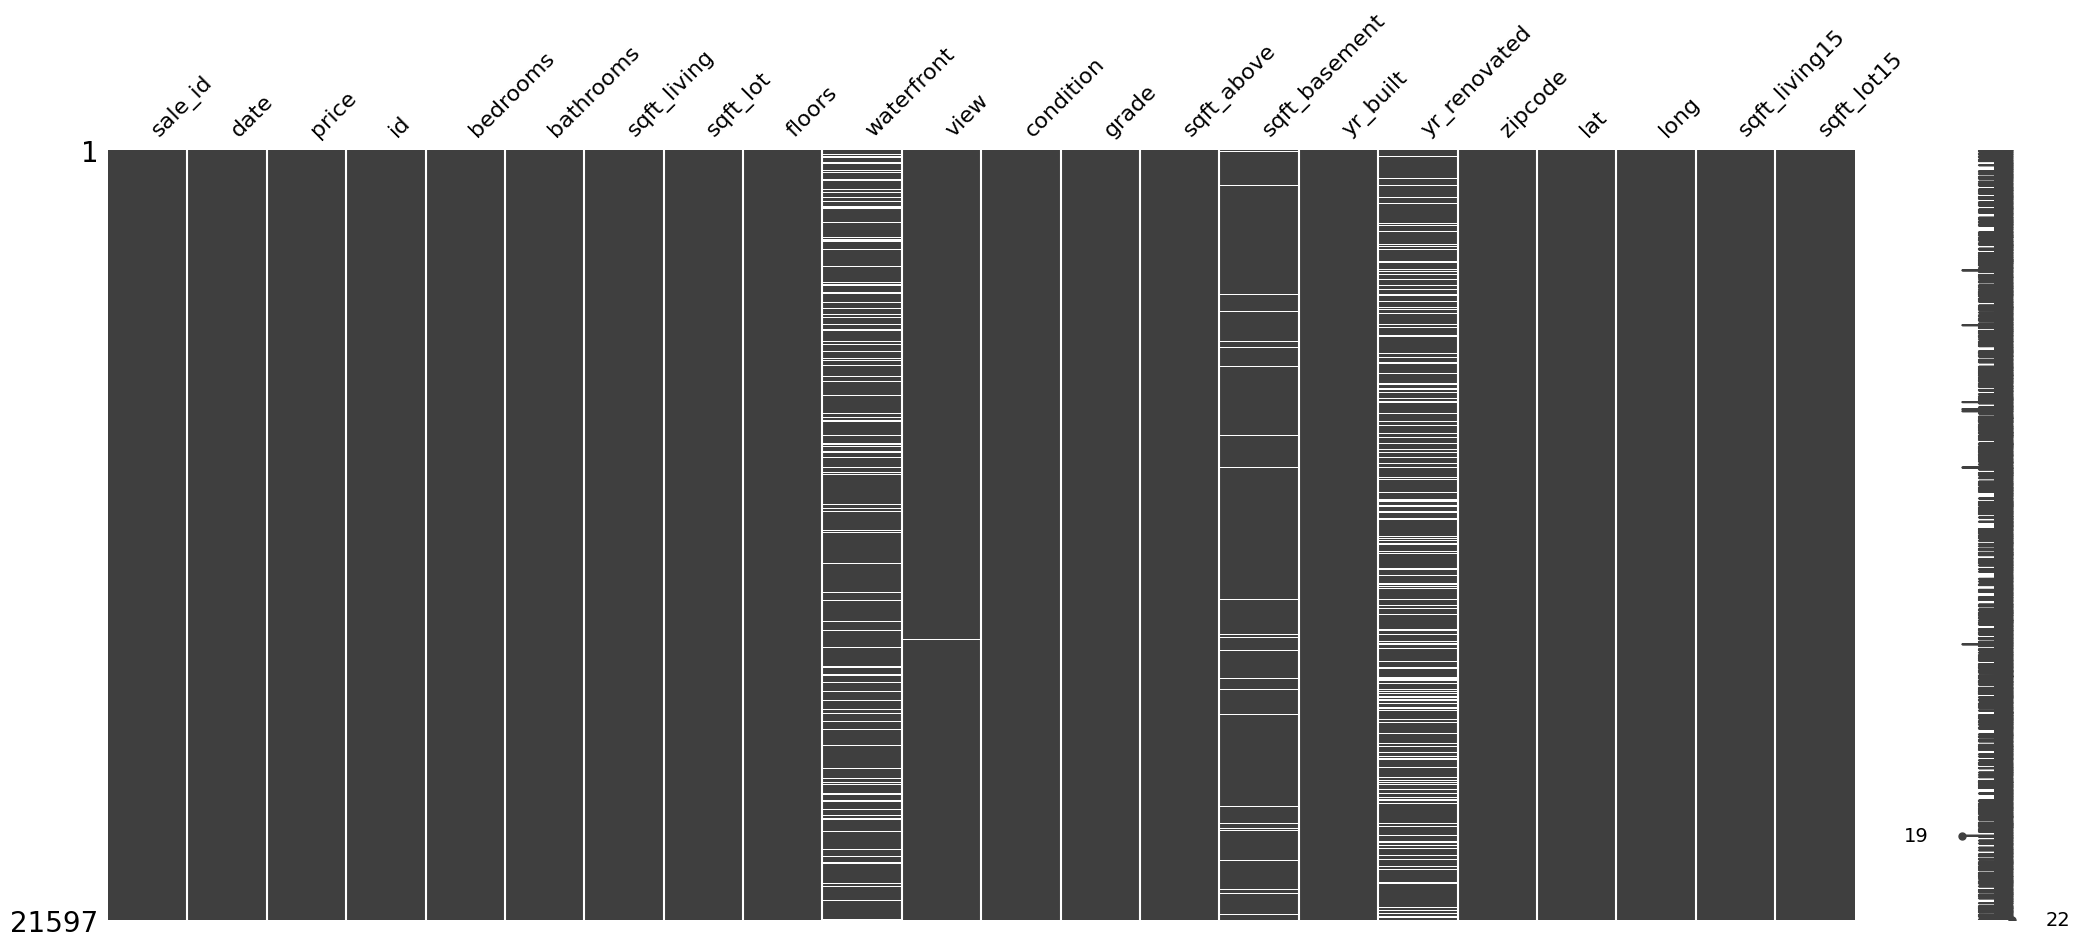

In [19]:
msno.matrix(df_eda)

In [20]:
print(f"numbers of rows : {df_eda.shape[0]}")
print(f"missing values in waterfront : {round(df_eda.waterfront.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_eda.sqft_basement.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_eda.yr_renovated.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_eda.view.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df_eda.isna().sum().sum()/(df_eda.shape[0]*df_eda.shape[1])*100,2)} %")


numbers of rows : 21597
missing values in waterfront : 11.07 %
missing values in sqft_basement : 2.09 %
missing values in yr_renovated : 17.82 %
missing values in view : 0.29 %
missing values in data frame : 1.42 %


In [21]:
df_new = df_eda

df_new.fillna(0, inplace=True)

df_new.fillna({'waterfront': 0, 'sqrt_basement': 291.857, 'view': 0, 'yr_renovated': 0}, inplace=True)


df_new

,sale_id,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,3,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,0.000,98028,47.738,-122.233,2720.000,8062.000
3,4,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,5,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,21594,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,21595,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,21596,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,0.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


In [22]:
df_numeric = df_eda.select_dtypes(include='number')
print(df_numeric)

       sale_id      price          id  bedrooms  bathrooms  sqft_living  \
0            1 221900.000  7129300520     3.000      1.000     1180.000   
1            2 538000.000  6414100192     3.000      2.250     2570.000   
2            3 180000.000  5631500400     2.000      1.000      770.000   
3            4 604000.000  2487200875     4.000      3.000     1960.000   
4            5 510000.000  1954400510     3.000      2.000     1680.000   
...        ...        ...         ...       ...        ...          ...   
21592    21593 360000.000   263000018     3.000      2.500     1530.000   
21593    21594 400000.000  6600060120     4.000      2.500     2310.000   
21594    21595 402101.000  1523300141     2.000      0.750     1020.000   
21595    21596 400000.000   291310100     3.000      2.500     1600.000   
21596    21597 325000.000  1523300157     2.000      0.750     1020.000   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0      5650.000   1.000       

In [23]:
corr = df_numeric.corr()
print(corr)


               sale_id  price     id  bedrooms  bathrooms  sqft_living  \
sale_id          1.000  0.027  0.007     0.010      0.107        0.045   
price            0.027  1.000 -0.017     0.309      0.526        0.702   
id               0.007 -0.017  1.000     0.001      0.005       -0.012   
bedrooms         0.010  0.309  0.001     1.000      0.515        0.578   
bathrooms        0.107  0.526  0.005     0.515      1.000        0.756   
sqft_living      0.045  0.702 -0.012     0.578      0.756        1.000   
sqft_lot        -0.027  0.090 -0.132     0.032      0.088        0.173   
floors           0.180  0.257  0.019     0.178      0.503        0.354   
waterfront      -0.008  0.264 -0.004    -0.002      0.064        0.105   
view            -0.013  0.393  0.012     0.078      0.186        0.282   
condition       -0.096  0.036 -0.024     0.026     -0.126       -0.059   
grade            0.082  0.668  0.008     0.357      0.666        0.763   
sqft_above       0.072  0.605 -0.011  

In [24]:
import plotly.express as px

fig = px.imshow(corr, 
                text_auto=True,  
                height = 1000, width = 1000,
                color_continuous_midpoint = 0.0,
                range_color=[-1, 1],
                title="Correlation Matrix")

fig.show()

In [25]:
df_numeric_new = df_new.select_dtypes(include='number')
print(df_numeric_new)

       sale_id      price          id  bedrooms  bathrooms  sqft_living  \
0            1 221900.000  7129300520     3.000      1.000     1180.000   
1            2 538000.000  6414100192     3.000      2.250     2570.000   
2            3 180000.000  5631500400     2.000      1.000      770.000   
3            4 604000.000  2487200875     4.000      3.000     1960.000   
4            5 510000.000  1954400510     3.000      2.000     1680.000   
...        ...        ...         ...       ...        ...          ...   
21592    21593 360000.000   263000018     3.000      2.500     1530.000   
21593    21594 400000.000  6600060120     4.000      2.500     2310.000   
21594    21595 402101.000  1523300141     2.000      0.750     1020.000   
21595    21596 400000.000   291310100     3.000      2.500     1600.000   
21596    21597 325000.000  1523300157     2.000      0.750     1020.000   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0      5650.000   1.000       

In [26]:
corr_new = df_numeric_new.corr()
print(corr_new)


               sale_id  price     id  bedrooms  bathrooms  sqft_living  \
sale_id          1.000  0.027  0.007     0.010      0.107        0.045   
price            0.027  1.000 -0.017     0.309      0.526        0.702   
id               0.007 -0.017  1.000     0.001      0.005       -0.012   
bedrooms         0.010  0.309  0.001     1.000      0.515        0.578   
bathrooms        0.107  0.526  0.005     0.515      1.000        0.756   
sqft_living      0.045  0.702 -0.012     0.578      0.756        1.000   
sqft_lot        -0.027  0.090 -0.132     0.032      0.088        0.173   
floors           0.180  0.257  0.019     0.178      0.503        0.354   
waterfront      -0.008  0.264 -0.004    -0.002      0.064        0.105   
view            -0.013  0.393  0.012     0.078      0.186        0.282   
condition       -0.096  0.036 -0.024     0.026     -0.126       -0.059   
grade            0.082  0.668  0.008     0.357      0.666        0.763   
sqft_above       0.072  0.605 -0.011  

In [27]:
import plotly.express as px

fig = px.imshow(corr_new, 
                text_auto=True,  
                height = 1000, width = 1000,
                 color_continuous_scale="Greens",
                color_continuous_midpoint = 0.0,
                range_color=[-1, 1],
                title="Correlation Matrix")

fig.show()

# Hypothesis 1 : Houses located closer to the city center have higher prices than those far away. 

In [3]:
import plotly.express as px

# Make sure you are in Jupyter Notebook or JupyterLab
# This keeps the plot inline
import plotly.io as pio
#pio.renderers.default = "notebook"  # or "notebook_connected"

df_new['price_bin'] = pd.qcut(df_new['price'], q=6, labels=False)

fig = px.scatter_mapbox(
    df_new,
    lat='lat',
    lon='long',
    color='price_bin',
    hover_data=['price', 'zipcode'],
    zoom=10,
    height=1000,
    title='Seattle Price Map',
    color_continuous_scale='Turbo'
)


fig.update_layout(mapbox_style="open-street-map")  # street map style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


NameError: name 'df_new' is not defined

In [29]:
city_center_lat = 47.6062
city_center_lon = -122.3321

# Subtract Seattle city center coordinates
df_new["lat_dc"] = df_new["lat"] - city_center_lat
df_new["long_dc"] = df_new["long"] - city_center_lon  # ✅ use city_center_lon

# Convert to approximate km
df_new["lat_km"] = df_new["lat_dc"] * 111          # 1° latitude ≈ 111 km
df_new["long_km"] = df_new["long_dc"] * 85         # 1° longitude ≈ 85 km in Seattle


In [30]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Apply to your dataframe
df_new["distance_from_center_km"] = df_new.apply(
    lambda row: haversine(city_center_lat, city_center_lon, row["lat"], row["long"]), axis=1
)

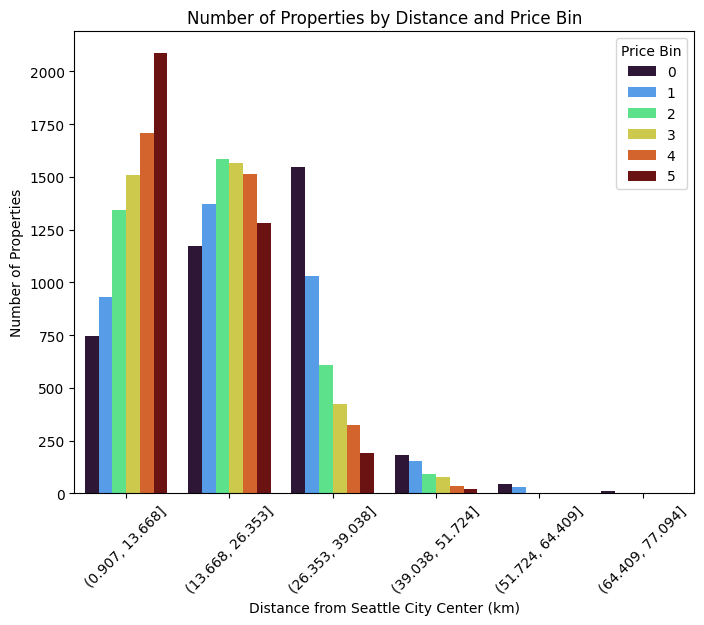

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

df_new["distance_bin"] = pd.cut(df_new["distance_from_center_km"], bins=6)

counts = df_new.groupby(["distance_bin", "price_bin"]).size().reset_index(name="count")

# Pivot the table so distance_bin is x, price_bin is y
heatmap_data = counts.pivot(index="price_bin", columns="distance_bin", values="count")
# Get 6 discrete colors from turbo colormap (for 6 price bins)
colors = cm.turbo(np.linspace(0, 1, len(df_new["price_bin"].unique())))
plt.figure(figsize=(8,6))
sns.barplot(x="distance_bin", y="count", hue="price_bin", data=counts, palette=colors)

plt.xlabel("Distance from Seattle City Center (km)")
plt.ylabel("Number of Properties")
plt.title("Number of Properties by Distance and Price Bin")
plt.xticks(rotation=45)
plt.legend(title="Price Bin")
plt.show()




# Hypothesis 2 :  Homes with larger living  sizes have higher prices, independent of house size.

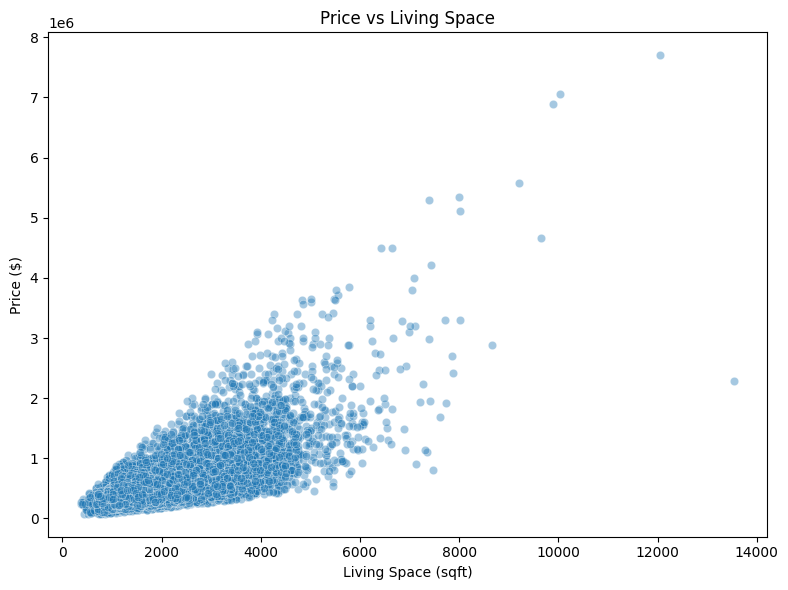

In [32]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='sqft_living',
    y='price',
    data=df_new,
    alpha=0.4
)

plt.title("Price vs Living Space")
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

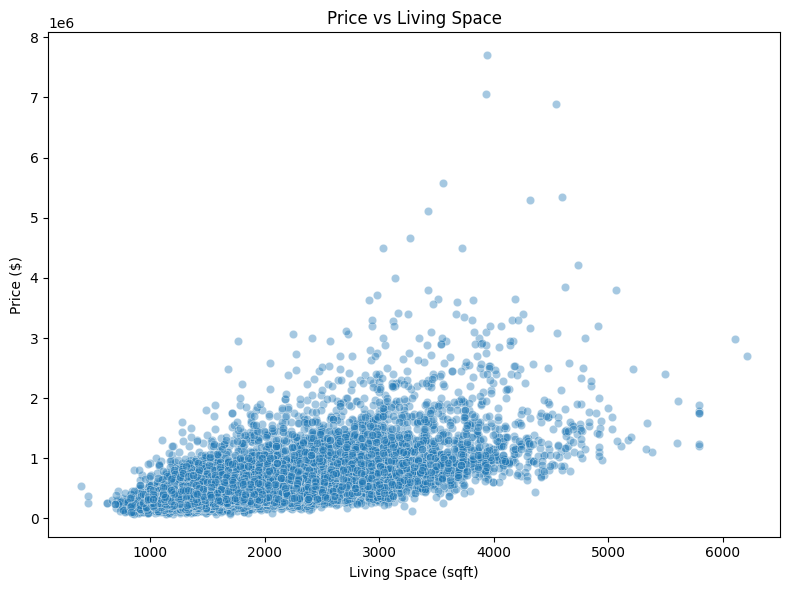

In [33]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='sqft_living15',
    y='price',
    data=df_new,
    alpha=0.4
)

plt.title("Price vs Living Space")
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


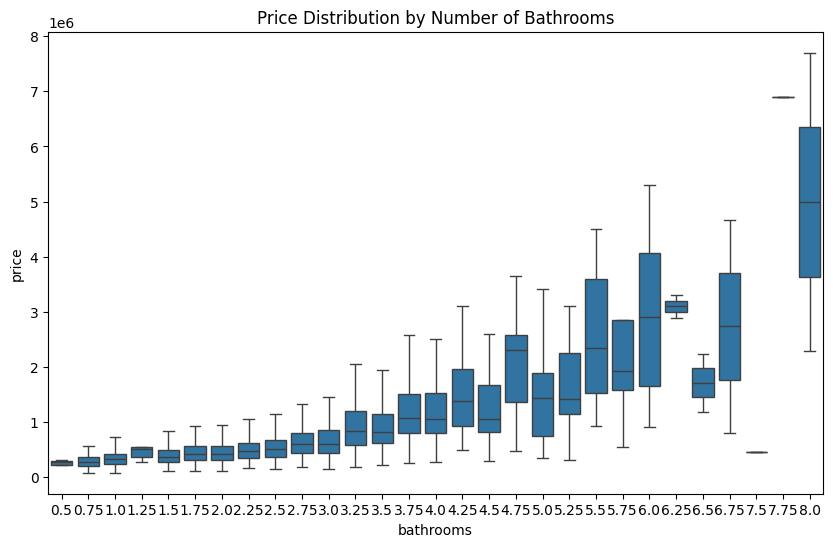

In [34]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x='bathrooms',
    y='price',
    data=df_new,
    showfliers=False
)


plt.title("Price Distribution by Number of Bathrooms")
plt.show()

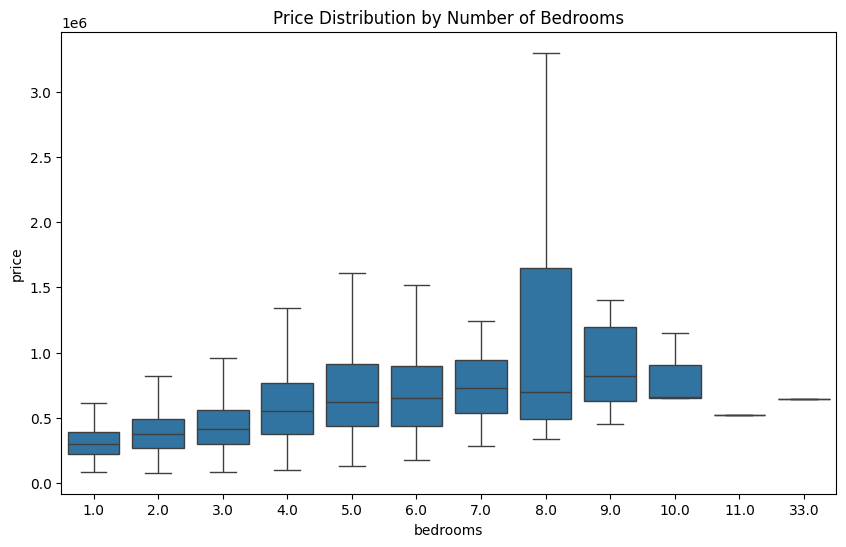

In [35]:
plt.figure(figsize=(10,6))

sns.boxplot(
    x='bedrooms',
    y='price',
    data=df_new,
    showfliers=False
)


plt.title("Price Distribution by Number of Bedrooms")
plt.show()

In [36]:
import plotly.express as px

# Make sure you are in Jupyter Notebook or JupyterLab
# This keeps the plot inline
import plotly.io as pio
#pio.renderers.default = "notebook"  # or "notebook_connected"

bins = [0, 6, 9, 13]               # Define grade edges
labels = ['Low', 'Medium', 'High'] # Labels for bins
df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

fig = px.scatter_mapbox(
    df_new,
    lat='lat',
    lon='long',
    color='grade_bin',
    hover_data=['price', 'zipcode'],
    zoom=10,
    height=1000,
    title='Seattle Price Map',
    color_continuous_scale='Plasma'
)


fig.update_layout(mapbox_style="open-street-map")  # street map style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("price_vs_distance.html", include_plotlyjs="cdn")





In [37]:
import pandas as pd

# Example: df['grade'] exists
bins = [0, 6, 9, 13]  # define edges
labels = ['Low', 'Medium', 'High']  # bin labels

df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

              count        mean        std        min        25%         50%  \
grade_bin                                                                      
Low        2308.000  295249.056 123537.868  78000.000 210000.000  270000.000   
Medium    17654.000  505801.750 244859.084  90000.000 335000.000  454925.000   
High       1635.000 1258670.451 707372.118 316000.000 812750.000 1040000.000   

                  75%         max  
grade_bin                          
Low        358000.000 1200000.000  
Medium     615000.000 3070000.000  
High      1490000.000 7700000.000  


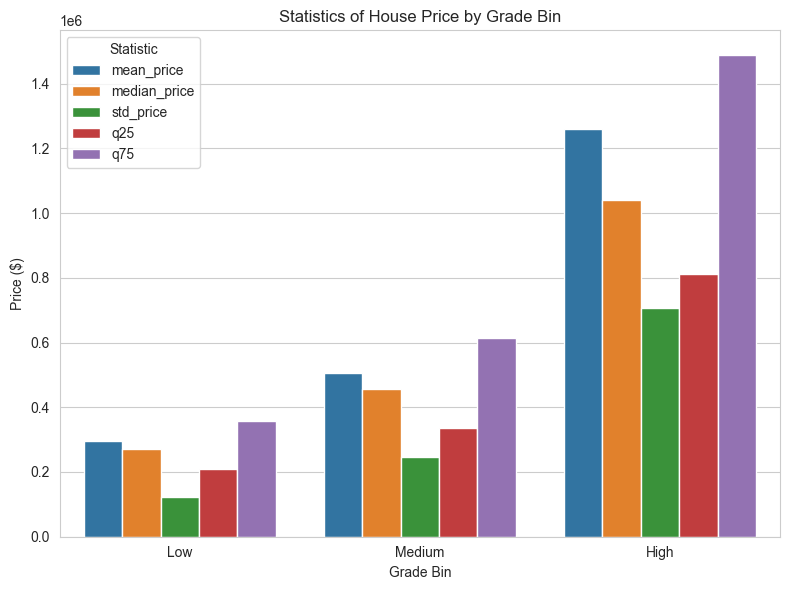

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
# df should have 'price' and 'grade' columns
# df = pd.read_csv('your_data.csv')

# 1️⃣ Bin the grades
bins = [0, 6, 9, 13]               # Define grade edges
labels = ['Low', 'Medium', 'High'] # Labels for bins
df_new['grade_bin'] = pd.cut(df_new['grade'], bins=bins, labels=labels)

# 2️⃣ Aggregate by median price
summary = df_new.groupby('grade_bin')['price'].describe()
print(summary)

summary = df_new.groupby('grade_bin')['price'].agg(
    mean_price='mean',
    median_price='median',
    std_price='std',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
).reset_index()

#print(summary)


# Set Seaborn style
sns.set_style("whitegrid")


summary_melted = summary.melt(
    id_vars='grade_bin',
    var_name='Statistic',
    value_name='Price'
)


plt.figure(figsize=(8,6))

sns.barplot(
    x='grade_bin',
    y='Price',
    hue='Statistic',
    data=summary_melted
)



plt.title("Statistics of House Price by Grade Bin")
plt.xlabel("Grade Bin")
plt.ylabel("Price ($)")
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()







